In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
efficiency_data = pd.read_csv('../Data/03_Results/metrics_stations_over_day.csv')


In [32]:
efficiency_data

,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
0,"Abbey Orchard Street, Westminster",0,0.068966,0.200000,0.131034,49,5.0,3.0,3.0,0.076923,0.046154,0.046154
1,"Abbey Orchard Street, Westminster",1,0.068966,0.200000,0.131034,50,1.0,1.0,0.0,0.015385,0.015385,0.000000
2,"Abbey Orchard Street, Westminster",2,0.068966,0.800000,0.731034,49,2.0,5.0,2.0,0.030769,0.076923,0.030769
3,"Abbey Orchard Street, Westminster",3,0.068966,0.500000,0.431034,47,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,"Abbey Orchard Street, Westminster",4,0.068966,0.200000,0.131034,47,1.0,2.0,2.0,0.015385,0.030769,0.030769
...,...,...,...,...,...,...,...,...,...,...,...,...
8875,"Wren Street, Holborn",19,0.121212,0.500000,0.378788,107,106.0,115.0,170.0,1.630769,1.769231,2.615385
8876,"Wren Street, Holborn",20,0.121212,0.650000,0.528788,109,63.0,95.0,108.0,0.969231,1.461538,1.661538
8877,"Wren Street, Holborn",21,0.151515,0.547368,0.395853,114,40.0,85.0,79.0,0.615385,1.307692,1.215385
8878,"Wren Street, Holborn",22,0.151515,0.560000,0.408485,116,15.0,71.0,23.0,0.230769,1.092308,0.353846


In [33]:
# Cap median_fullness_rate to 1 
efficiency_data['median_fullness_rate'] = efficiency_data['median_fullness_rate'].apply(lambda x: min(x, 1))
# Recalucalte the fullness deviation
efficiency_data['fullness_deviation'] = abs(efficiency_data['median_fullness_rate'] - efficiency_data['target_fullness'])
efficiency_data

,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
0,"Abbey Orchard Street, Westminster",0,0.068966,0.200000,0.131034,49,5.0,3.0,3.0,0.076923,0.046154,0.046154
1,"Abbey Orchard Street, Westminster",1,0.068966,0.200000,0.131034,50,1.0,1.0,0.0,0.015385,0.015385,0.000000
2,"Abbey Orchard Street, Westminster",2,0.068966,0.800000,0.731034,49,2.0,5.0,2.0,0.030769,0.076923,0.030769
3,"Abbey Orchard Street, Westminster",3,0.068966,0.500000,0.431034,47,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,"Abbey Orchard Street, Westminster",4,0.068966,0.200000,0.131034,47,1.0,2.0,2.0,0.015385,0.030769,0.030769
...,...,...,...,...,...,...,...,...,...,...,...,...
8875,"Wren Street, Holborn",19,0.121212,0.500000,0.378788,107,106.0,115.0,170.0,1.630769,1.769231,2.615385
8876,"Wren Street, Holborn",20,0.121212,0.650000,0.528788,109,63.0,95.0,108.0,0.969231,1.461538,1.661538
8877,"Wren Street, Holborn",21,0.151515,0.547368,0.395853,114,40.0,85.0,79.0,0.615385,1.307692,1.215385
8878,"Wren Street, Holborn",22,0.151515,0.560000,0.408485,116,15.0,71.0,23.0,0.230769,1.092308,0.353846


In [5]:
efficiency_data.describe()

,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
count,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000
mean,11.500000,0.301060,0.467074,0.224712,90.407095,63.598761,63.598761,91.356081,0.978442,0.978442,1.405478
std,6.922576,0.181284,0.136762,0.149661,27.867047,113.013103,111.145756,161.771887,1.738663,1.709935,2.488798
min,0.000000,0.020833,0.200000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.160000,0.410526,0.103377,72.000000,7.000000,7.000000,3.000000,0.107692,0.107692,0.046154
50%,11.500000,0.263158,0.500000,0.205556,100.000000,37.000000,37.000000,37.000000,0.569231,0.569231,0.569231
75%,17.250000,0.411765,0.542857,0.326087,113.000000,81.000000,81.000000,116.000000,1.246154,1.246154,1.784615
max,23.000000,1.471429,0.800000,0.957527,127.000000,5071.000000,4913.000000,4388.000000,78.015385,75.584615,67.507692


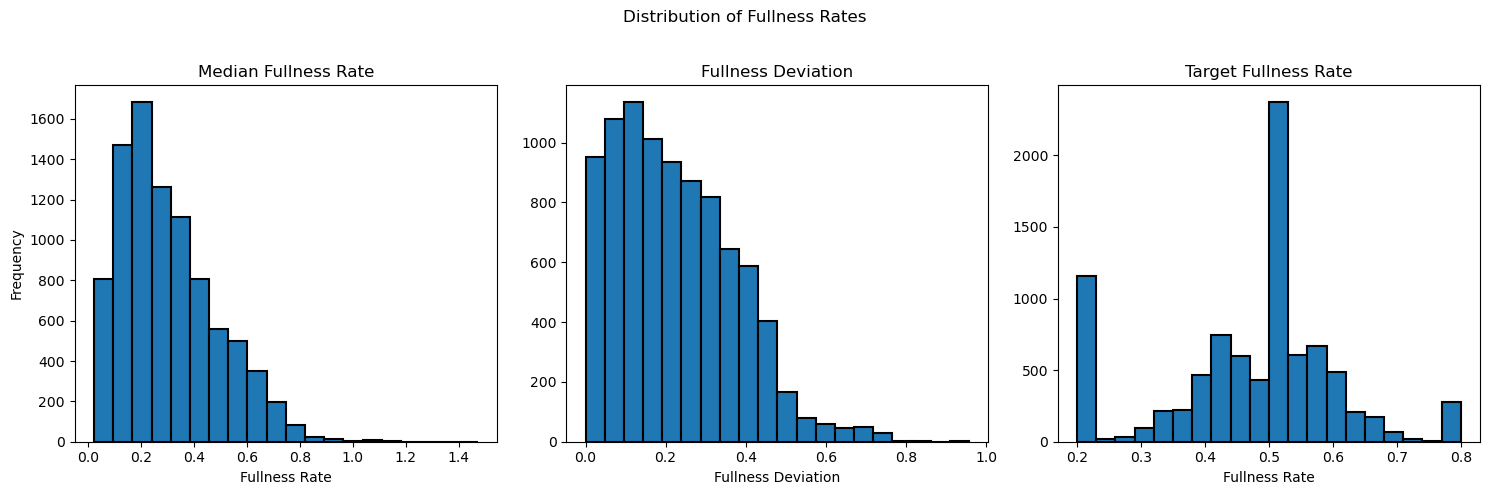

In [14]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Define border properties for the bins
bin_border_color = 'black'
bin_border_width = 1.5

# Plot the histograms with borders around the bins
axs[0].hist(efficiency_data['median_fullness_rate'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[0].set_title('Median Fullness Rate')
axs[0].set_xlabel('Fullness Rate')
axs[0].set_ylabel('Frequency')

axs[1].hist(efficiency_data['fullness_deviation'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[1].set_title('Fullness Deviation')
axs[1].set_xlabel('Fullness Deviation')

axs[2].hist(efficiency_data['target_fullness'], bins=20, edgecolor=bin_border_color, linewidth=bin_border_width)
axs[2].set_title('Target Fullness Rate')
axs[2].set_xlabel('Fullness Rate')

# Add a main title for the entire figure
fig.suptitle('Distribution of Fullness Rates')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

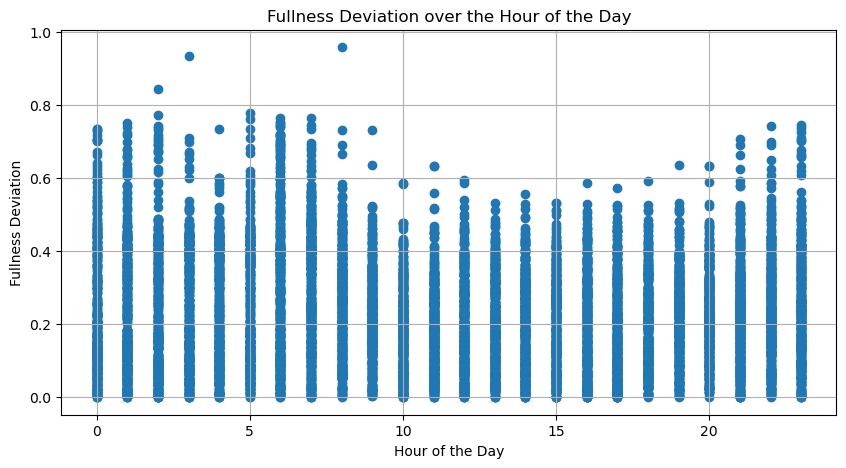

In [17]:
# During what time of the day (hour), was the fullness deviation the highest?
# Plot the fullness deviation over the hour of the day
plt.figure(figsize=(10, 5))
plt.scatter(efficiency_data['hour'], efficiency_data['fullness_deviation'])
plt.title('Fullness Deviation over the Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Fullness Deviation')
plt.grid(True)
plt.show()



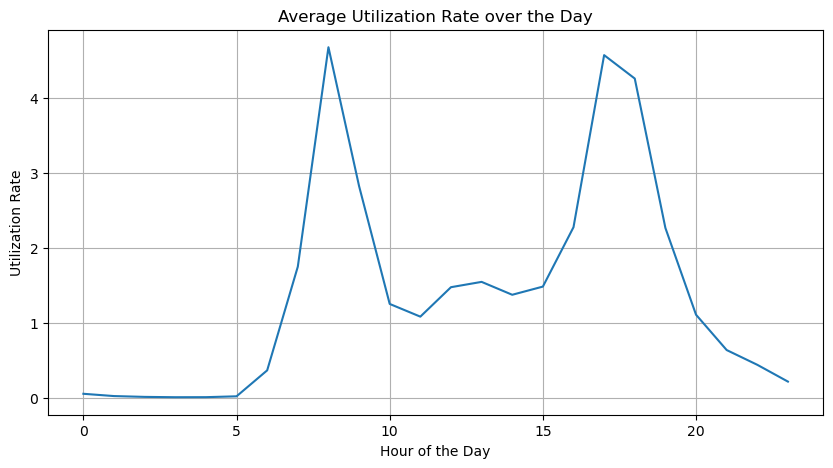

In [16]:
# Plot the average utilization rate over the day
plt.figure(figsize=(10, 5))
plt.plot(efficiency_data.groupby('hour')['Utilisation_avg'].mean())
plt.title('Average Utilization Rate over the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Utilization Rate')
plt.grid(True)
plt.show()


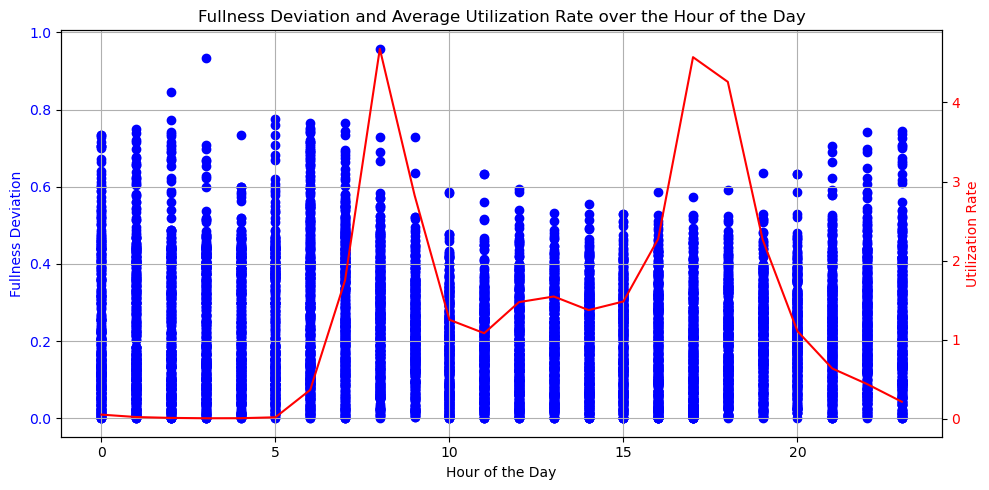

In [18]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Fullness Deviation as a scatter plot
ax1.scatter(efficiency_data['hour'], efficiency_data['fullness_deviation'], color='b', label='Fullness Deviation')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Fullness Deviation', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis for Utilization Rate
ax2 = ax1.twinx()
ax2.plot(efficiency_data.groupby('hour')['Utilisation_avg'].mean(), color='r', label='Utilization Rate')
ax2.set_ylabel('Utilization Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and show the plot
plt.title('Fullness Deviation and Average Utilization Rate over the Hour of the Day')
fig.tight_layout()  # To make sure labels don't overlap
plt.show()

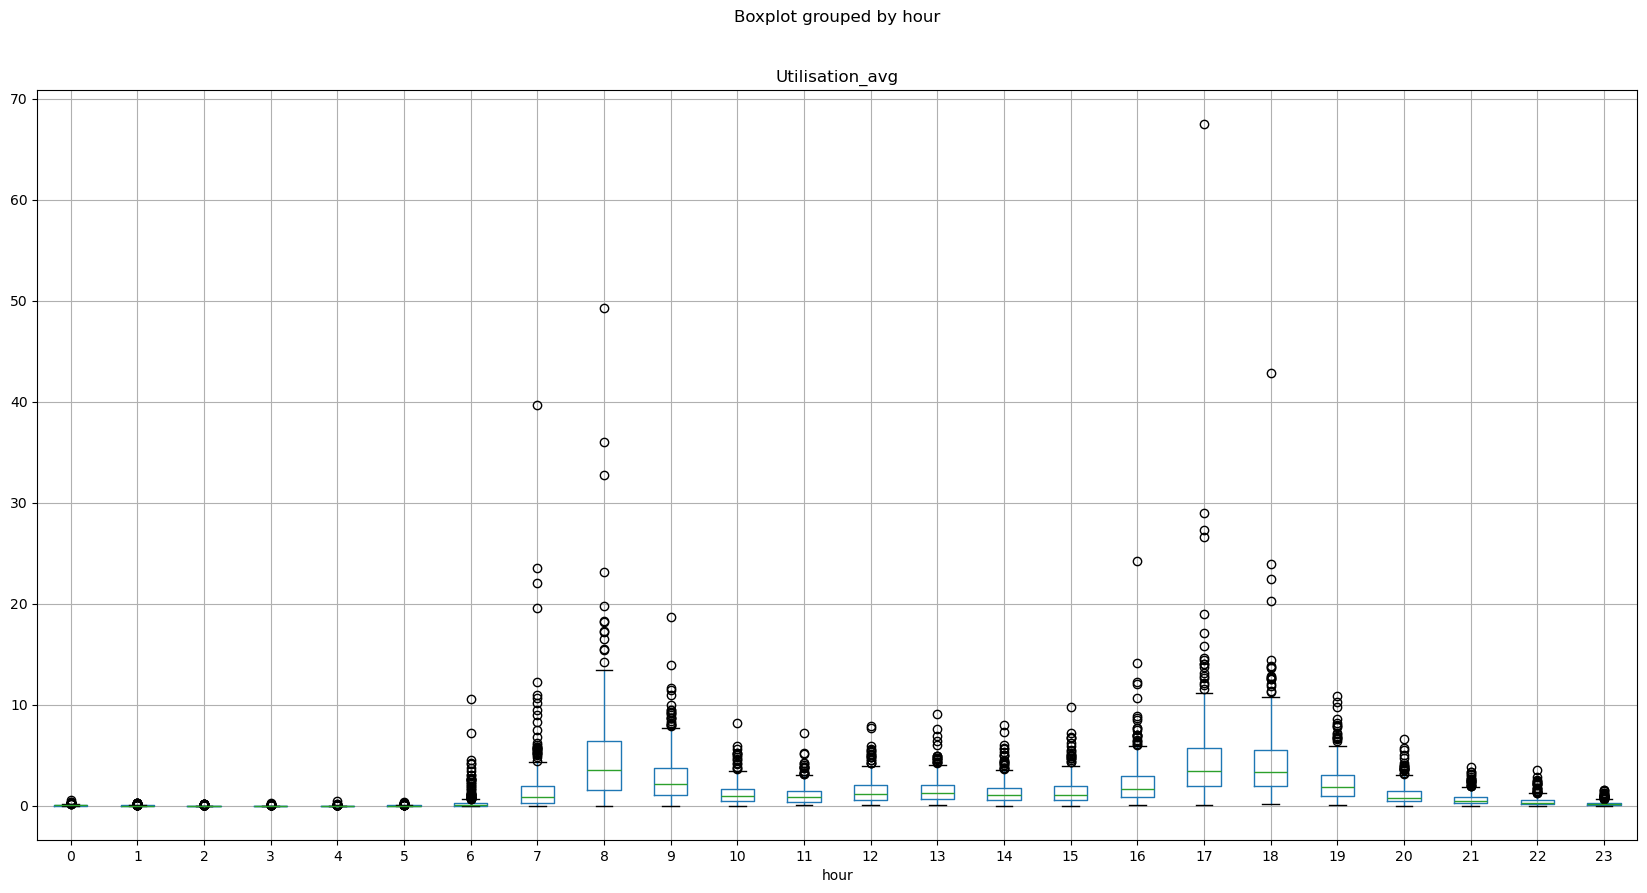

In [19]:
# boxplot of efficiency scores 
fig, ax = plt.subplots(figsize=(20, 10))
efficiency_data.boxplot(column='Utilisation_avg', by='hour', ax=ax)
plt.show()

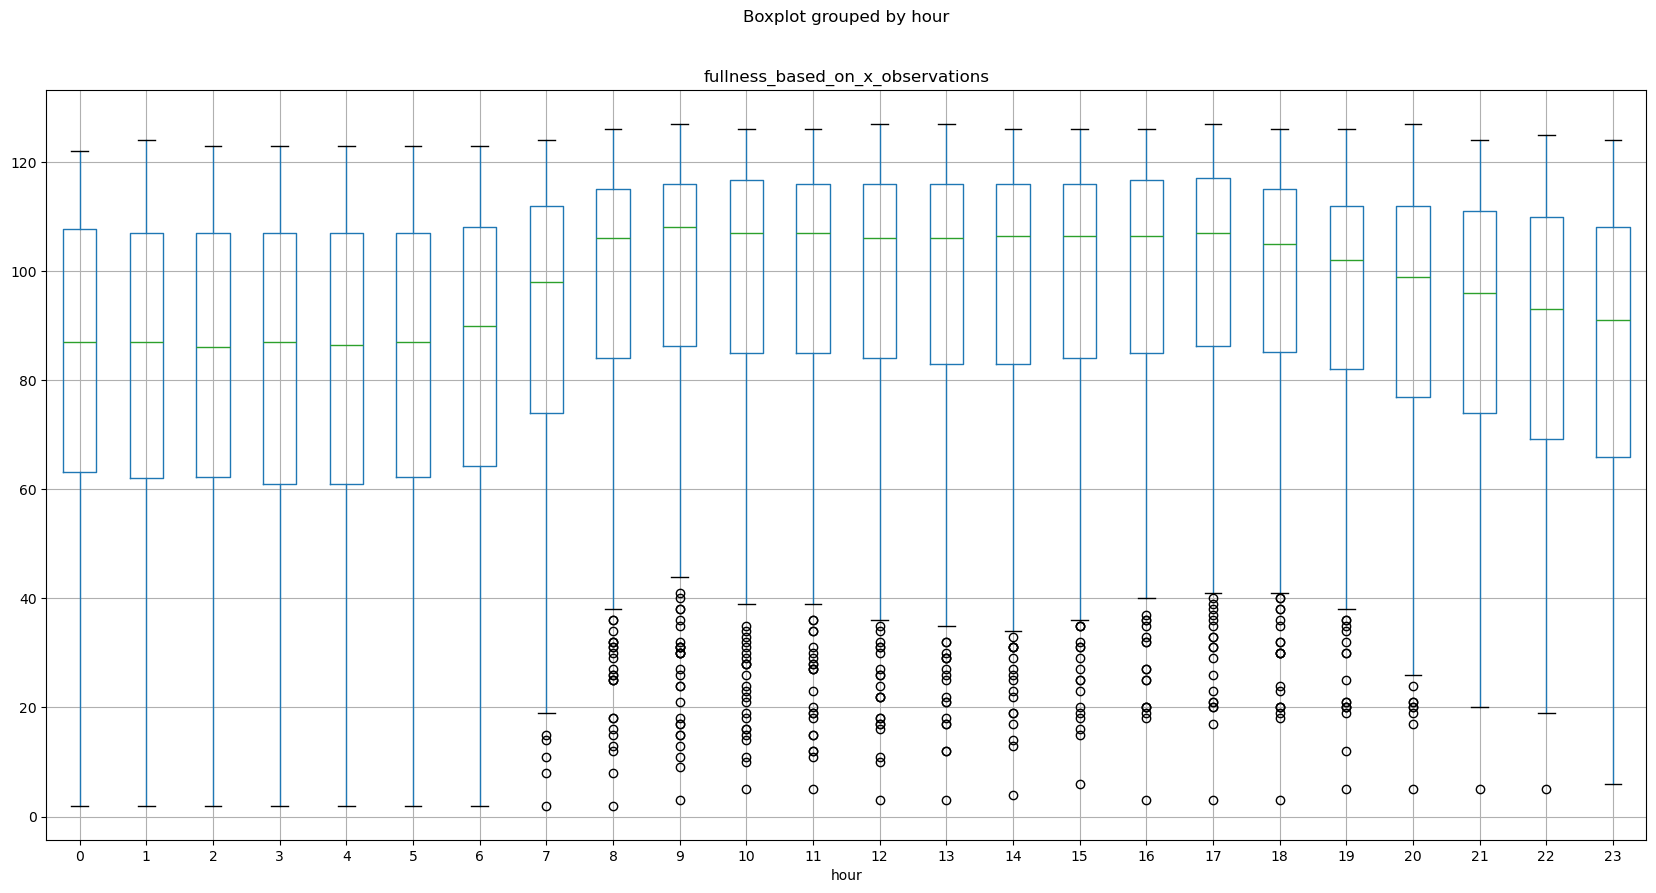

In [20]:
# Plot the distribution of number of observations per hour
fig, ax = plt.subplots(figsize=(20, 10))
efficiency_data.boxplot(column='fullness_based_on_x_observations', by='hour', ax=ax)
plt.show()


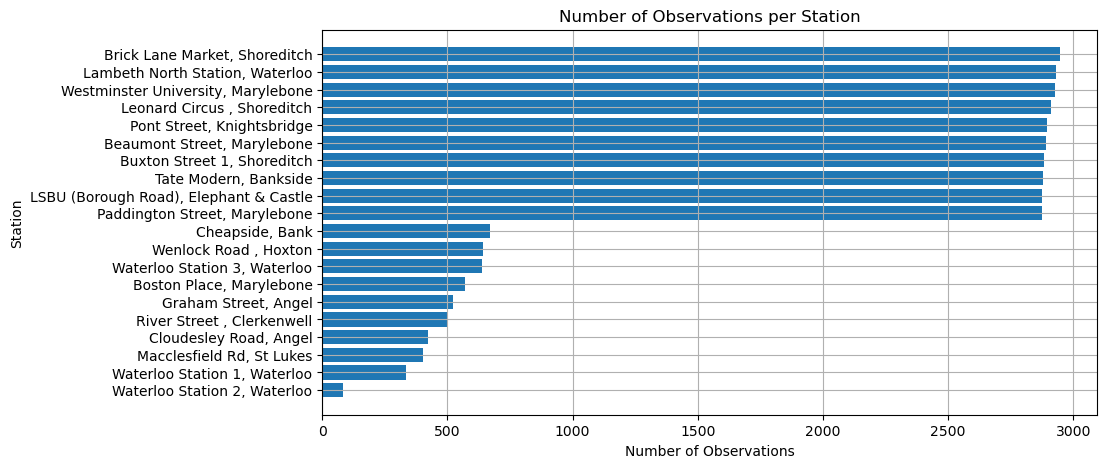

In [28]:
n_observations_per_station = efficiency_data.groupby('station').agg({'fullness_based_on_x_observations': 'sum'})
n_observations_per_station = n_observations_per_station.sort_values(by='fullness_based_on_x_observations', ascending=True)
# Select the 10 first and 10 last stations
n_observations_per_station = pd.concat([n_observations_per_station.head(10), n_observations_per_station.tail(10)])

# Plot the number of observations per station
plt.figure(figsize=(10, 5))
plt.barh(n_observations_per_station.index, n_observations_per_station['fullness_based_on_x_observations'])
plt.title('Number of Observations per Station')
plt.xlabel('Number of Observations')
plt.ylabel('Station')
plt.grid(True)
plt.show()


In [29]:
waterloo_2_data = efficiency_data[efficiency_data['station'] == 'Waterloo Station 2, Waterloo']
waterloo_2_data = waterloo_2_data.sort_values(by='hour')

# Plot the fullness deviation over the hour of the day

,station,hour,median_fullness_rate,target_fullness,fullness_deviation,fullness_based_on_x_observations,pick_up_demand_sum_over_3_months,drop_off_demand_sum_over_3_months,utilisation_over_3_months,pick_up_demand_avg,drop_off_demand_avg,Utilisation_avg
8400,"Waterloo Station 2, Waterloo",0,0.218750,0.425000,0.206250,2,12.0,7.0,5.0,0.184615,0.107692,0.076923
8401,"Waterloo Station 2, Waterloo",1,0.239583,0.800000,0.560417,2,0.0,0.0,0.0,0.000000,0.000000,0.000000
8402,"Waterloo Station 2, Waterloo",2,0.239583,0.200000,0.039583,2,0.0,0.0,0.0,0.000000,0.000000,0.000000
8403,"Waterloo Station 2, Waterloo",3,0.239583,0.200000,0.039583,2,0.0,0.0,0.0,0.000000,0.000000,0.000000
8404,"Waterloo Station 2, Waterloo",4,0.239583,0.200000,0.039583,2,1.0,1.0,2.0,0.015385,0.015385,0.030769
8405,"Waterloo Station 2, Waterloo",5,0.239583,0.200000,0.039583,2,3.0,1.0,0.0,0.046154,0.015385,0.000000
8406,"Waterloo Station 2, Waterloo",6,0.239583,0.468235,0.228652,2,667.0,10.0,163.0,10.261538,0.153846,2.507692
8407,"Waterloo Station 2, Waterloo",7,0.229167,0.465596,0.236430,2,1498.0,18.0,439.0,23.046154,0.276923,6.753846
8408,"Waterloo Station 2, Waterloo",8,0.197917,0.372197,0.174281,2,1449.0,25.0,494.0,22.292308,0.384615,7.600000
8409,"Waterloo Station 2, Waterloo",9,0.083333,0.345161,0.261828,3,797.0,28.0,304.0,12.261538,0.430769,4.676923
